In [7]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action="ignore")

In [112]:
df1=pd.DataFrame(np.random.rand(5,3), columns=["c1","c2","c3"])
df1

df1[["c1","c2"]]

df1.loc[:,"c1"]
df1.loc[:3,["c1","c2"]]

df1.iloc[:3, :2]

,c1,c2
0,0.027678,0.676437
1,0.360387,0.628783
2,0.659262,0.900590


In [8]:
df.ix[0,0]=None
df

,c1,c2,c3
0,NaN,0.778862,0.521111
1,0.255552,0.265236,0.514161
2,0.999368,0.420518,0.095039
3,0.549018,0.237486,0.896364
4,0.265415,0.985565,0.840827


In [93]:
df.ix[1,["c1","c3"]]=None
df

df.ix[2,["c2"]]=None
df.ix[3,["c2"]]=None
df.ix[4,["c2"]]=None
df

df.fillna(0)
df.fillna(method="ffill") #아래에서 위로 복사되어 채워짐


df

KeyError: "None of [Index(['c1', 'c3'], dtype='object')] are in the [columns]"

In [14]:
df.mean

<bound method DataFrame.mean of          c1        c2        c3
0       NaN  0.778862  0.521111
1       NaN  0.265236       NaN
2  0.999368       NaN  0.095039
3  0.549018       NaN  0.896364
4  0.265415       NaN  0.840827>

In [22]:
df.fillna(df.mean())  #NAN 값을 df의 평균값으로 대체
df.where(pd.notnull(df),df.mean(),axis="columns")
df.fillna(df.mean()["c1":"c2"]) #"c1"1열 "c2"2열에 대해서만 평균값으로 대체

,c1,c2,c3
0,0.604601,0.778862,0.521111
1,0.604601,0.265236,NaN
2,0.999368,0.522049,0.095039
3,0.549018,0.522049,0.896364
4,0.265415,0.522049,0.840827


## argmin함수 

In [21]:
arr=np.array([1,2,3,10,20,30,0.1,0.2])
np.min(arr)
np.argmin(arr)  #argmin: 인덱스 출력  ex)최소값인 인덱스 출력


array([1. , 2. , 3. , 0. , 0. , 0. , 0.1, 0.2])

## where함수 

In [ ]:
np.where(arr<1) #where 함수는 조건문으로 사용
np.where(arr>=10,0,arr) #10보다 큰 값인 경우 0으로 바꺼라  #np.where(조건, 참, 거짓)


In [24]:
df=pd.DataFrame({"c1":[1,2,3,4,5],
                 "c2":[6,7,8,9,10]
                })

df.ix[[1,3],"c2"]=None
df

,c1,c2,c2p
0,1,6.0,6.0
1,2,NaN,NaN
2,3,8.0,8.0
3,4,NaN,NaN
4,5,10.0,10.0


In [27]:
#c2p열에는 c2열 값이 notnull이면 c2열 값을, c2열 값이 null이면 c1열 값으로 채우고자 함
df["c2p"]=np.where((pd.notnull(df["c2"])==True),df["c2"],df["c1"])
df

,c1,c2,c2p
0,1,6.0,6.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


In [31]:
for i in df.index:
    if pd.notnull(df.ix[i,"c2"])==True:
        df.ix[i, "c2p"]=df.ix[i,"c2"]
    else:
        df.ix[i,"c2p"]=df.ix[i,"c1"]
df

,c1,c2,c2p
0,1,6.0,6.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


## dropna 함수 

In [ ]:
#dropna 메서드 : 행(axis=0)/열(axis=1)

In [32]:
df=pd.DataFrame({"c1":[1,2,3,4,5],
                 "c2":[6,7,8,9,10]
                })

df.ix[[1,3],"c2"]=None
df

,c1,c2
0,1,6.0
1,2,NaN
2,3,8.0
3,4,NaN
4,5,10.0


In [33]:
df.dropna(axis=0) #결측값이 있는 행전체 제거
df.dropna(axis=1) # 열전체 제거
df[["c1","c2"]].dropna()

,c1
0,1
1,2
2,3
3,4
4,5


## interpolate() 함수 : 결측값 보간 

In [34]:
#결측값 보간(interpolate)

"""
결측값을 선형적으로 비례하는 값으로 보관

이미지 보간 : 그라데이션과 비슷
"""
from datetime import datetime
#datatime 모듈에 있는 datatime 함수 호출

In [42]:
dateStr=["1/13/2020","1/16/2020","1/17/2020","1/20/2020"]

dates=pd.to_datetime(dateStr)
type(dates)  # type : datetimeIndex 

pandas.core.indexes.datetimes.DatetimeIndex

In [43]:
ts=pd.Series([1,None,None,10],index=dates)
ts

2020-01-13     1.0
2020-01-16     NaN
2020-01-17     NaN
2020-01-20    10.0
dtype: float64

In [46]:
tslr=ts.interpolate()  # nan값을 일정한 증가(비례하게)를 가지는 값으로 대체
tslr

2020-01-13     1.0
2020-01-16     4.0
2020-01-17     7.0
2020-01-20    10.0
dtype: float64

In [47]:
tsTime=ts.interpolate(method="time", limit=1) 
tsTime

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17          NaN
2020-01-20    10.000000
dtype: float64

## replace 함수 

In [ ]:
#fillna : 결측값에 대해서 대체
#replace : 모든 값(na 포함)에 대해서 대체 가능
#결측값/실측값에 대해 대체

In [53]:
s=pd.Series([1,2,3,4,np.nan])
s.replace(3,9)   #replace(원래 값, 대체할 값)
s.replace(np.nan,5)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [54]:
#리스트에서 replace 가능

s.replace([1,2,3],[6,7,8]) 

0    6.0
1    7.0
2    8.0
3    4.0
4    NaN
dtype: float64

In [55]:
#딕셔너리에서 replace 가능

s.replace({1:5}) #{원래값 : 대체할 값}

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [57]:
#데이터프레임에서 replace 적용

df=pd.DataFrame({"c1": ["aaa","b","c","d"],
              "c2": [1,2,3,4],
              "c3": [5,6,7,np.nan]
             })
df

,c1,c2,c3
0,aaa,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [60]:
df.replace({"c1":"aaa"},{"c1":"bbb"}) #c1열의 aaa -> bbb
df.replace({"c3":np.nan},{"c3":99}) 

,c1,c2,c3
0,aaa,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,99.0


## duplicated() 와 drop_duplicates() : 중복 데이터 처리 

In [ ]:
#병합 : 중복 데이터 발생
#중복데이터 여부 : duplicated()
#중복데이터 처리 drop_duplicates() : 한개만 남겨놓고 나머지 제거 

In [71]:
df=pd.DataFrame({"k1": ["b","b","b","c","c"],
                "k2": ["x","y","y","x","z"],
                "col": [10,20,30,40,50]
                
               })

df


,k1,k2,col
0,b,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [72]:
df.duplicated(["k1"]) # default : 중복된 두번째 값이 TRUE  
df.duplicated(["k1"],keep="first") #keep="first" : 중복된 첫번째 값을 유지 (False)
df.duplicated(["k1"],keep="last") #keep="last" :중복된 마지막 값 유지 (False)
df.duplicated(["k1"],keep=False) #중복된 값은 모두 True

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [73]:
df.duplicated(["k1"])

0    False
1     True
2     True
3    False
4     True
dtype: bool

In [74]:
df.duplicated(["k1"],keep="last")

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [75]:
df.duplicated(["k1"],keep="first") #keep="first" : 중복된 첫번째 값을 유지

0    False
1     True
2     True
3    False
4     True
dtype: bool

In [65]:
df.duplicated(["k1","k2"]) 

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [77]:
#중복값 제거(1개만 살리고 나머지 중복은 제거)
df.drop_duplicates(["k1"], keep="first")

,k1,k2,col
0,b,x,10
3,c,x,40


## unique() 함수 

In [78]:
#유일한 값  : unique()

In [81]:
df=pd.DataFrame({
    "a":["a1","a1","a2","a2","a3"],
     "b":["b1","b1","b2","b2",np.nan],
     "c":[1,1,3,4,4]   
})

df["a"].unique()
df["b"].unique() #nan도 유일한 값으로 확인

array(['b1', 'b2', nan], dtype=object)

## value_counts() 함수 

In [85]:
#유일한 값 세기 : value_counts()
#normalize= 디폴트(False) : 개수,  True: 상대비율

df['a'].value_counts(normalize=True) #상대비율
df['a'].value_counts(normalize=False) #갯수

a1    2
a2    2
a3    1
Name: a, dtype: int64

In [87]:
#sort =True : 갯수 기준 정렬
#ascending= True : 오름차순 정렬 / ascending= False : 내림차순 정렬 
df['a'].value_counts(normalize=False, sort=True, ascending=False) #갯수

a1    2
a2    2
a3    1
Name: a, dtype: int64

In [88]:
df

,a,b,c
0,a1,b1,1
1,a1,b1,1
2,a2,b2,3
3,a2,b2,4
4,a3,NaN,4


In [91]:
df['c'].value_counts(sort=True, ascending=True) #유일한 값을 기준으로 오름차순 

3    1
1    2
4    2
Name: c, dtype: int64

In [92]:
df['c'].value_counts(sort=False) #정렬기준이 없음

1    2
3    1
4    2
Name: c, dtype: int64

In [114]:
df["b"].value_counts() #dafault : dropna=True #nan은 세지않음

b1    2
b2    2
Name: b, dtype: int64

In [115]:
df["c"].value_counts(bins=[0,1,2,3,4,5], sort=True) #group별 데이터 개수 구하기 
#bin : 개구간 , [] : 페구간

(3.0, 4.0]       2
(-0.001, 1.0]    2
(2.0, 3.0]       1
(4.0, 5.0]       0
(1.0, 2.0]       0
Name: c, dtype: int64

In [117]:
res=pd.cut(df['c'],bins=[0,1,2,3,4,5])  #type = category
pd.value_counts(res)

(3, 4]    2
(0, 1]    2
(2, 3]    1
(4, 5]    0
(1, 2]    0
Name: c, dtype: int64

In [ ]:
#변수들 간 척도가 다를 경우 데이터 표준화
#모집단: 전체 집단, 모집단에서 표본 추출-> 표본집단 평균, 표준편차 -> 통계량 -> 모평균,모분산 추정

"""
모수적 방법

-중심극한정리 : 무작위로 복원추출하면 연속형자료의 평균에 대한 분포가 정규분포를 띈다면 표본이 최소 30개이상의 정규분포를 따른다.


비모수적 방법

-표본이 10개 미만의 표본일 경우 모수적 방법을 사용

"""

## 표준화 구하기 

In [ ]:
"""
표준화 : (각데이터-평균) /표준편차

모집단이 정규분포를 따르는 경우에 평균:0 , 표준편차:1인 표준정규분포로 표준화하는 방법
방법1) numpy, 방법2)scipy.stats.zscore, 방법3) sklearn.preprocessing
"""

### 방법1) numpy로 표준화 

In [118]:
from numpy import *

In [129]:
data=np.random.randint(5, size=(3,2)) #6행5열 난수 발생
data

array([[0, 2],
       [2, 3],
       [3, 3]])

In [138]:
#np.mean(data) 
np.mean(data, axis=0) #각 열에 대한 평균  ** axis를 줘야지 행과 열에 각각 평균값이 나옴
np.mean(data, axis=1) #각 행에 대한 평균


print(data)
print("="*30)
print(np.mean(data,axis=0))
print("="*30)
print(data-np.mean(data, axis=0))  #각 데이터 - 평균

[[0 2]
 [2 3]
 [3 3]]
[1.66666667 2.66666667]
[[-1.66666667 -0.66666667]
 [ 0.33333333  0.33333333]
 [ 1.33333333  0.33333333]]


In [141]:
std_data=(data-np.mean(data, axis=0))/np.std(data,axis=0) #(각데이터-평균) /표준편차
print(std_data)

print(np.mean(std_data,axis=0)) #평균 0
print(np.std(std_data, axis=0)) #표준편차 1
print(np.var(std_data, axis=0)) #분산 1

[[-1.33630621 -1.41421356]
 [ 0.26726124  0.70710678]
 [ 1.06904497  0.70710678]]
[-7.40148683e-17  2.96059473e-16]
[1. 1.]


In [142]:
print(std_data)

[[-1.33630621 -1.41421356]
 [ 0.26726124  0.70710678]
 [ 1.06904497  0.70710678]]


### 방법2) scipy로 표준화 

In [143]:
import scipy.stats as ss

In [145]:
data_ss=ss.zscore(data)
data_ss

array([[-1.33630621, -1.41421356],
       [ 0.26726124,  0.70710678],
       [ 1.06904497,  0.70710678]])

### 방법3) sklearn으로 표준화

In [146]:
from sklearn.preprocessing import * #표준화=>전처리 작업

In [147]:
ss_data=StandardScaler().fit_transform(data)
ss_data

array([[-1.33630621, -1.41421356],
       [ 0.26726124,  0.70710678],
       [ 1.06904497,  0.70710678]])

## "이상치가 포함된 데이터"를 표준화하기

In [ ]:
#예외적인 값(이상치, 특이값(outlier))가 들어있는 데이터의 표준화
#표준정규분포로의 표준화 : 이상치, 특이값이 없어야함
#z= (x-mean)/std

방법1) 이상치,특이값를 제거

방법2) 중앙값(median)과 IQR을 이용하여 스케일링 (이상치에 영향을 크게 미치는 평균과 표준편차를 대신해서 이용)



## StandardScaler() 함수 : 평균과 표준편차 이용 

 방법1) 이상치,특이값를 제거

In [148]:
#RobustScaler():이상치가 있는 데이터 표준화

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [149]:
mu,sigma=5,2

In [153]:
x=mu+sigma*np.random.randn(100)
x

array([ 5.25834094,  8.91778255,  6.93492117,  6.8207901 ,  3.96340994,
        6.96588865,  4.50874924,  6.88530793,  4.28022843,  7.41381405,
        0.67507163,  3.76163791,  4.43705159,  3.181953  ,  4.17380333,
        3.48583678,  5.37688991,  3.99845476,  5.37666958,  3.22981788,
        6.59991572,  2.45028237,  6.00674704,  7.37009509, 10.83144303,
        4.51365415,  5.61287752,  5.28396453,  5.91312431,  7.08069957,
        6.16632524,  7.92833678,  8.97025784,  6.27309944,  7.01514777,
        4.15973249,  4.01438256,  4.90556908,  1.4367987 ,  4.00505504,
        3.43841909,  4.58889842,  5.06818804,  6.21839712,  4.11734199,
        7.6905713 ,  3.20568776,  6.26261866,  5.39630582,  5.36177111,
        5.54807486,  4.03376837,  4.25105471,  5.48225291,  6.39224092,
        4.98106004,  4.19149806,  6.34033742,  3.146537  ,  5.28031216,
        5.03905838,  5.4639499 ,  8.69928416,  2.8672462 ,  3.82747921,
        4.00954841,  4.44537736,  3.88567756,  6.04223975,  4.81

(array([ 3.,  5., 11., 28., 19., 16., 11.,  4.,  2.,  1.]),
 array([ 0.67507163,  1.69070877,  2.70634591,  3.72198305,  4.73762019,
         5.75325733,  6.76889447,  7.78453161,  8.80016875,  9.81580589,
        10.83144303]),
 <a list of 10 Patch objects>)

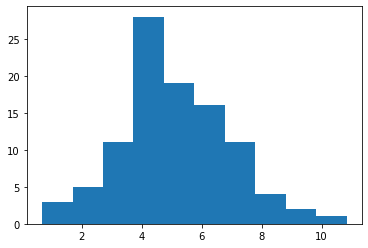

In [154]:
plt.hist(x)  #히스토그램 

In [155]:
np.mean(x)

5.073010596926672

In [156]:
np.std(x)

1.7975840561401555

In [157]:
x[98:100]=100 #이상치 100을 2개 넣어보기
x

array([  5.25834094,   8.91778255,   6.93492117,   6.8207901 ,
         3.96340994,   6.96588865,   4.50874924,   6.88530793,
         4.28022843,   7.41381405,   0.67507163,   3.76163791,
         4.43705159,   3.181953  ,   4.17380333,   3.48583678,
         5.37688991,   3.99845476,   5.37666958,   3.22981788,
         6.59991572,   2.45028237,   6.00674704,   7.37009509,
        10.83144303,   4.51365415,   5.61287752,   5.28396453,
         5.91312431,   7.08069957,   6.16632524,   7.92833678,
         8.97025784,   6.27309944,   7.01514777,   4.15973249,
         4.01438256,   4.90556908,   1.4367987 ,   4.00505504,
         3.43841909,   4.58889842,   5.06818804,   6.21839712,
         4.11734199,   7.6905713 ,   3.20568776,   6.26261866,
         5.39630582,   5.36177111,   5.54807486,   4.03376837,
         4.25105471,   5.48225291,   6.39224092,   4.98106004,
         4.19149806,   6.34033742,   3.146537  ,   5.28031216,
         5.03905838,   5.4639499 ,   8.69928416,   2.86

(array([97.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.67507163,  10.60756447,  20.5400573 ,  30.47255014,
         40.40504298,  50.33753581,  60.27002865,  70.20252149,
         80.13501433,  90.06750716, 100.        ]),
 <a list of 10 Patch objects>)

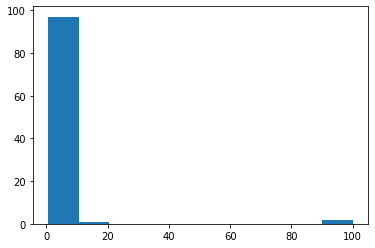

In [158]:
plt.hist(x)

(array([ 3., 24., 41., 25.,  4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

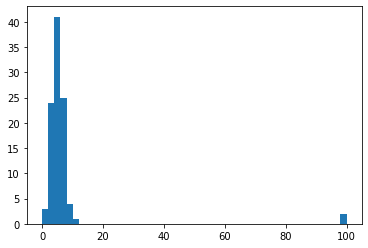

In [159]:
plt.hist(x, bins=np.arange(0,102,2))

In [160]:
x

array([  5.25834094,   8.91778255,   6.93492117,   6.8207901 ,
         3.96340994,   6.96588865,   4.50874924,   6.88530793,
         4.28022843,   7.41381405,   0.67507163,   3.76163791,
         4.43705159,   3.181953  ,   4.17380333,   3.48583678,
         5.37688991,   3.99845476,   5.37666958,   3.22981788,
         6.59991572,   2.45028237,   6.00674704,   7.37009509,
        10.83144303,   4.51365415,   5.61287752,   5.28396453,
         5.91312431,   7.08069957,   6.16632524,   7.92833678,
         8.97025784,   6.27309944,   7.01514777,   4.15973249,
         4.01438256,   4.90556908,   1.4367987 ,   4.00505504,
         3.43841909,   4.58889842,   5.06818804,   6.21839712,
         4.11734199,   7.6905713 ,   3.20568776,   6.26261866,
         5.39630582,   5.36177111,   5.54807486,   4.03376837,
         4.25105471,   5.48225291,   6.39224092,   4.98106004,
         4.19149806,   6.34033742,   3.146537  ,   5.28031216,
         5.03905838,   5.4639499 ,   8.69928416,   2.86

In [163]:
#StandardScaler().fit_transform(x) #(100,) => (100,1)  #fit_transform은 1차원이 출력이 안됨
x=x.reshape(100,1)
x=x.reshape(-1,1) #(100,) => (100,1) #-1: 자동으로 전체 읽음
x.shape
ss_x=StandardScaler().fit_transform(x) 

In [165]:
np.mean(ss_x)
np.std(ss_x) 

0.9999999999999999

(array([97.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.46900474,  0.27181752,  1.01263977,  1.75346203,  2.49428428,
         3.23510654,  3.97592879,  4.71675105,  5.45757331,  6.19839556,
         6.93921782]),
 <a list of 10 Patch objects>)

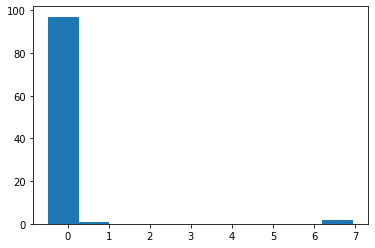

In [166]:
plt.hist(ss_x)

In [167]:
ss_x < 5

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

(array([ 3.,  5., 10., 28., 19., 16., 11.,  3.,  2.,  1.]),
 array([-0.46900474, -0.3932527 , -0.31750066, -0.24174862, -0.16599658,
        -0.09024454, -0.0144925 ,  0.06125954,  0.13701158,  0.21276362,
         0.28851566]),
 <a list of 10 Patch objects>)

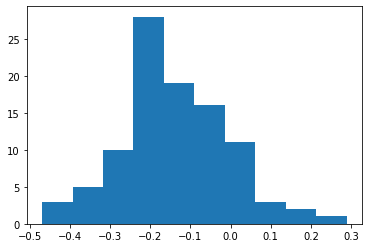

In [170]:
ss_x_z=ss_x[ss_x<5]  
plt.hist(ss_x_z)

(array([ 0.,  0.,  0.,  0.,  0.,  3.,  7., 28., 26., 20., 10.,  3.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

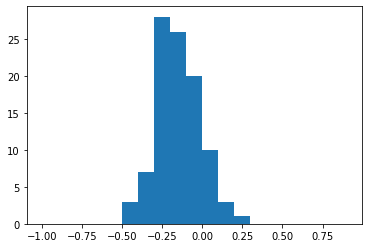

In [171]:
ss_x_z=ss_x[ss_x<5]  
plt.hist(ss_x_z, bins=np.arange(-1,1,0.1))

## RobustScaler() 함수 : 중앙값과 IQR를 이용 

방법2) 중앙값(median)과 IQR을 이용하여 스케일링

In [174]:
#이상치 포함 데이터의 중앙값, IQR를 이용하여 표준화

np.median(x)

q1=np.percentile(x,25)  #1사분위수 
q3=np.percentile(x,75) #3사분위수
iqr=q3-q1   #iqr

In [177]:
x_rs=RobustScaler().fit_transform(x)


(array([97.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-1.90104728,  2.41136931,  6.72378589, 11.03620248, 15.34861907,
        19.66103565, 23.97345224, 28.28586883, 32.59828541, 36.910702  ,
        41.22311859]),
 <a list of 10 Patch objects>)

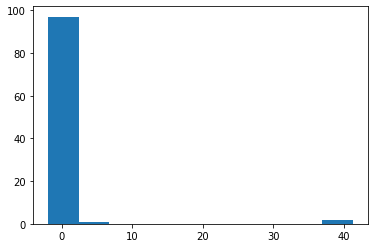

In [181]:
np.median(x_rs) #0
np.mean(x_rs) #0.8290..
np.std(x_rs) #5.8211..
plt.hist(x_rs)

(array([2., 4., 2., 1., 7., 8., 6., 7., 2., 3., 4., 7., 4., 3., 5., 5., 2.,
        3., 5.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

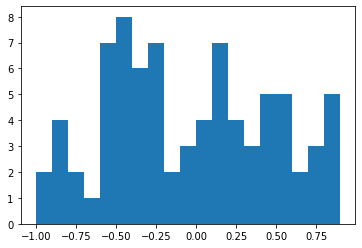

In [182]:
x_rs_z=x_rs[x_rs<10]
plt.hist(x_rs_z, bins=np.arange(-1,1,0.1))